In [2]:
import numpy as np
from scipy.optimize import minimize
from groo.groo import get_root
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
import seaborn as sns

from groo.groo import get_root
rf = get_root(".hidden_root_mc")
sys.path.append(os.path.join(rf))

from models_and_funcs import *

ics = ["AIC", "AICc", "BIC", "HQC"]

In [3]:
# data acrosss four models
dp = os.path.join(rf, "data", "four_models_B")
data = pd.DataFrame()
for f in os.listdir(dp):
    data = pd.concat([data, pd.read_csv(os.path.join(dp, f))])

In [4]:
#data = pd.read_csv(os.path.join(rf, "data", "model_comparison_iter2.csv"))
#data=data.loc[data["algo"].isin(["COBYLA"]),:]

In [5]:
data.head(10)

,Unnamed: 0,noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,mean_err_AIC,mean_err_AICc,mean_err_BIC,mean_err_HQC
0,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,0.273449,0.273449,0.273449,0.273449
1,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,31.891236,31.891236,31.891236,31.891236
2,0,5,150,rw2_val,CG,rw2_val,rw2_val,rw2_val,rw2_val,0.063355,0.063355,0.063355,0.063355
3,0,5,150,ph_basic,CG,ph_basic,ph_basic,rw1,rw1,7.342721,7.342721,7.148195,7.148195
4,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,5.165651,5.165651,5.165651,5.165651
5,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,3.172287,3.172287,3.172287,3.172287
6,0,5,150,rw2_val,CG,rw1,rw1,rw1,rw1,15.418050,15.418050,15.418050,15.418050
7,0,5,150,ph_basic,CG,rw1,rw1,rw1,rw1,10.645254,10.645254,10.645254,10.645254
8,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,3.261492,3.261492,3.261492,3.261492
9,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,15.680390,15.680390,15.680390,15.680390


### Correctly identified model


correct_AIC     0.813438
correct_AICc    0.806771
correct_BIC     0.744896
correct_HQC     0.781250
dtype: float64


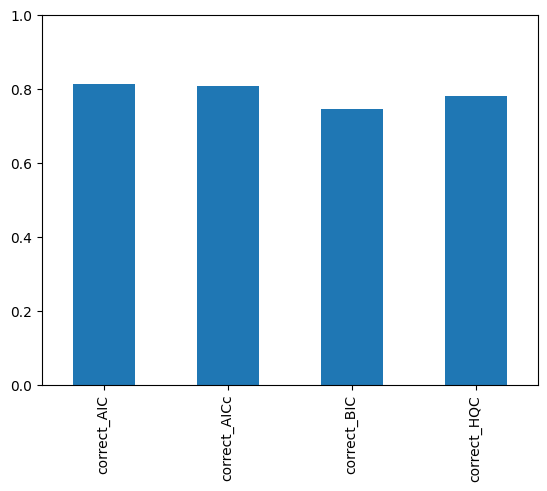

In [6]:
for ic in ics: 
    data["correct_"+ic] = data["true_model"] == data["best_model_"+ic]

data.filter(regex='^correct_').mean().plot.bar(ylim=[0,1])
print(data.filter(regex='^correct_').mean())




SyntaxError: invalid syntax. Perhaps you forgot a comma? (1898982414.py, line 1)

In [18]:
df = data.melt(id_vars=["noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["correct_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("correct_", "")

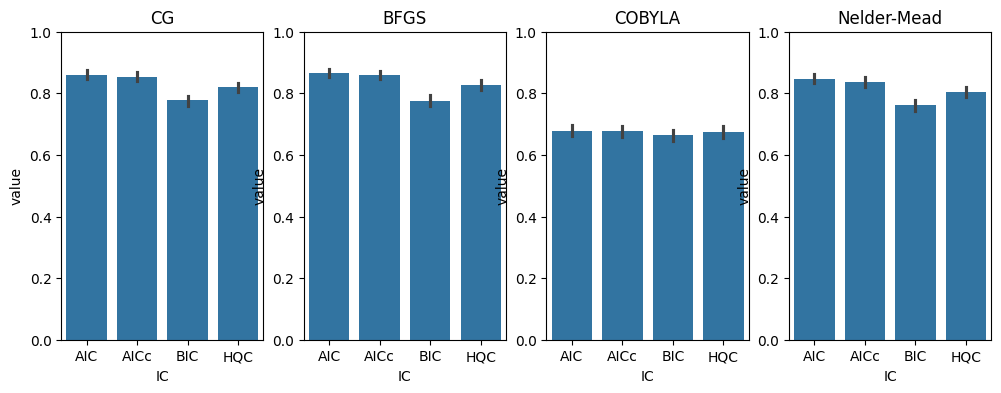

In [19]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

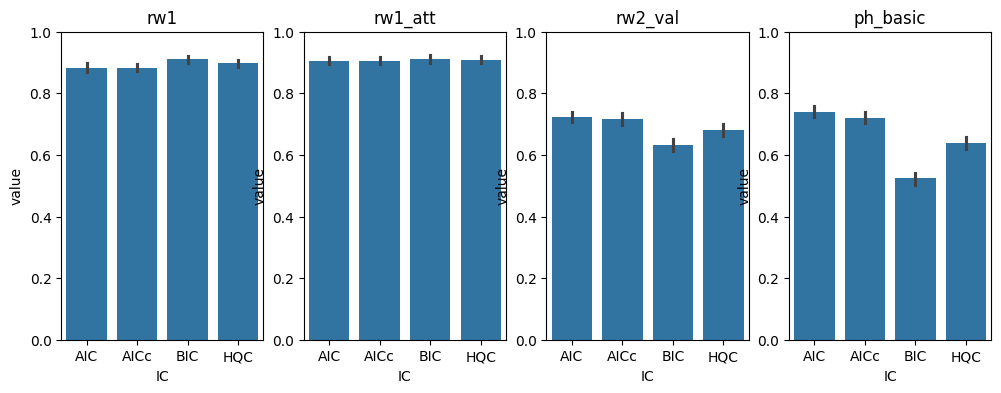

In [20]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())




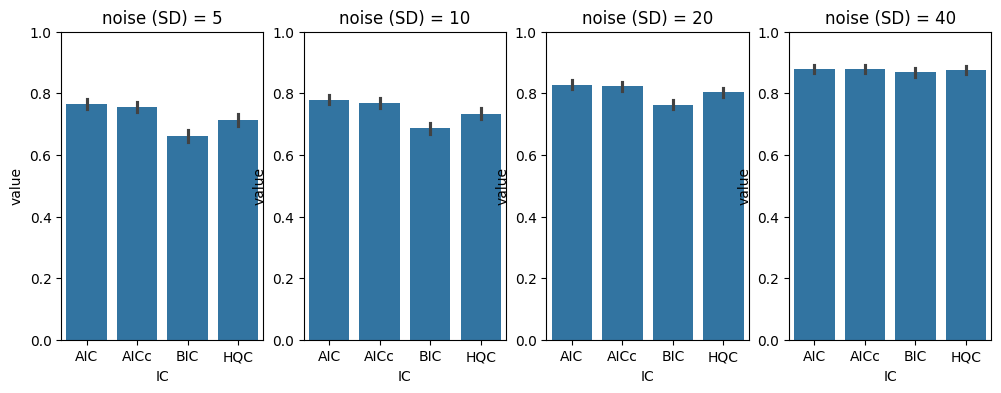

In [23]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



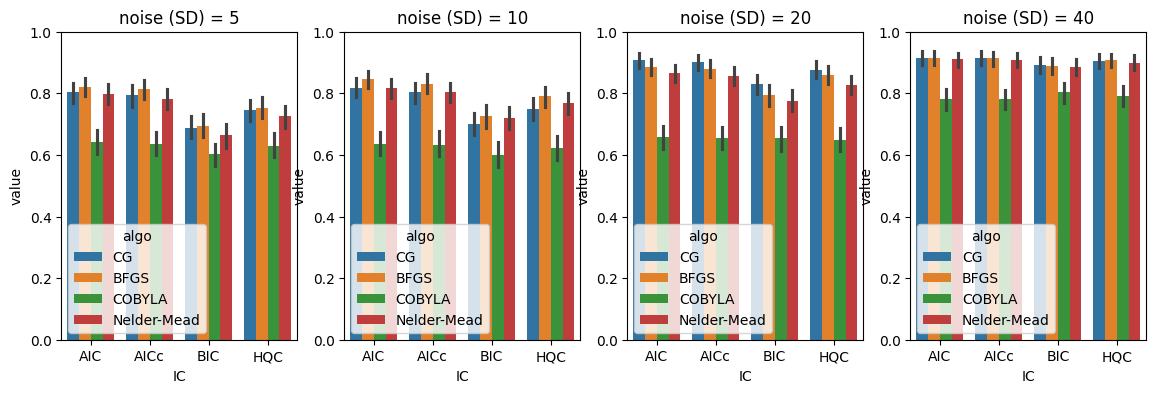

In [26]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="algo", hue_order=df["algo"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())


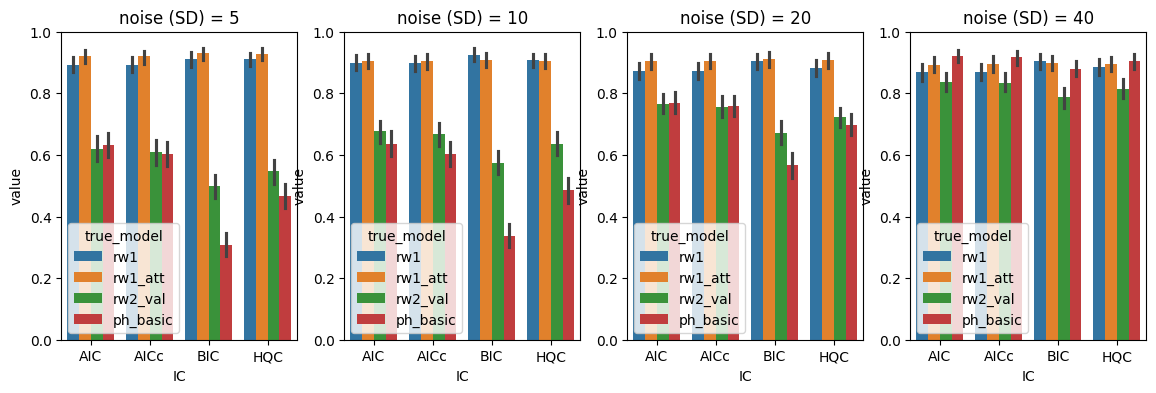

In [27]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="true_model", hue_order=df["true_model"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

<AxesSubplot: xlabel='noise'>

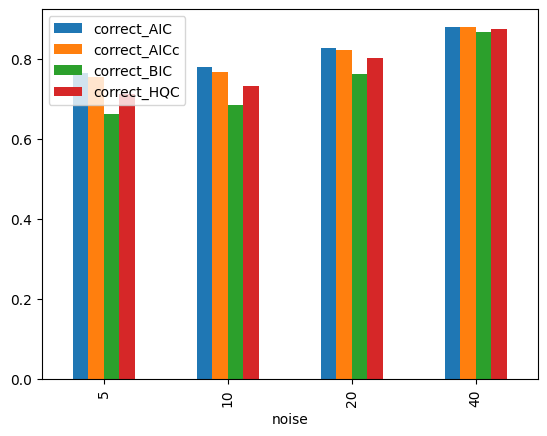

In [10]:
tdf = data.loc[:, ["noise"]+["correct_"+ic for  ic in ics]]
tdf.groupby(by="noise").mean().plot.bar()

<AxesSubplot: xlabel='cutoff'>

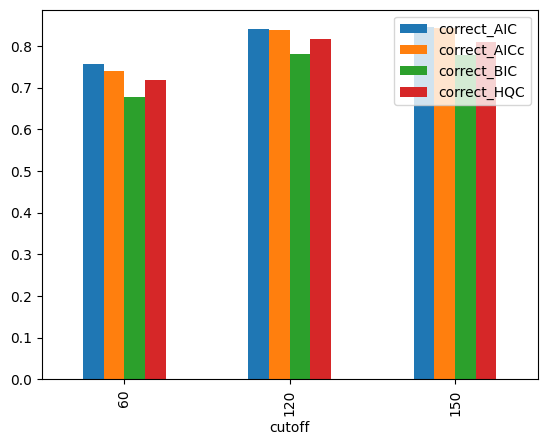

In [11]:
tdf = data.loc[:, ["cutoff"]+["correct_"+ic for  ic in ics]]
tdf.groupby(by="cutoff").mean().plot.bar()

### Mean error

In [28]:
data

,Unnamed: 0,noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,mean_err_AIC,mean_err_AICc,mean_err_BIC,mean_err_HQC,correct_AIC,correct_AICc,correct_BIC,correct_HQC
0,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,0.273449,0.273449,0.273449,0.273449,True,True,True,True
1,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,31.891236,31.891236,31.891236,31.891236,True,True,True,True
2,0,5,150,rw2_val,CG,rw2_val,rw2_val,rw2_val,rw2_val,0.063355,0.063355,0.063355,0.063355,True,True,True,True
3,0,5,150,ph_basic,CG,ph_basic,ph_basic,rw1,rw1,7.342721,7.342721,7.148195,7.148195,True,True,False,False
4,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,5.165651,5.165651,5.165651,5.165651,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,40,60,ph_basic,CG,ph_basic,ph_basic,ph_basic,ph_basic,0.191417,0.191417,0.191417,0.191417,True,True,True,True
196,0,40,60,rw1,CG,rw1,rw1,rw1,rw1,1.587031,1.587031,1.587031,1.587031,True,True,True,True
197,0,40,60,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,2.848585,2.848585,2.848585,2.848585,True,True,True,True
198,0,40,60,rw2_val,CG,rw2_val,rw2_val,rw2_val,rw2_val,0.128980,0.128980,0.128980,0.128980,True,True,True,True


In [37]:
df = data.melt(id_vars=["noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["mean_err_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("mean_err_", "")

In [55]:
df = df.loc[df["value"]!=np.inf,]
df = df.loc[df["value"]<100,:]

,noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,variable,value,IC
1418,40,120,rw2_val,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_AIC,1.255876e+02,AIC
4885,20,60,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_AIC,6.754003e+127,AIC
4889,20,60,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_AIC,1.276383e+06,AIC
11018,40,120,rw2_val,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_AICc,1.255876e+02,AICc
14485,20,60,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_AICc,6.754003e+127,AICc
14489,20,60,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_AICc,1.276383e+06,AICc
20618,40,120,rw2_val,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_BIC,1.255876e+02,BIC
24085,20,60,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_BIC,6.754003e+127,BIC
24089,20,60,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_BIC,1.276383e+06,BIC
30218,40,120,rw2_val,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,mean_err_HQC,1.255876e+02,HQC


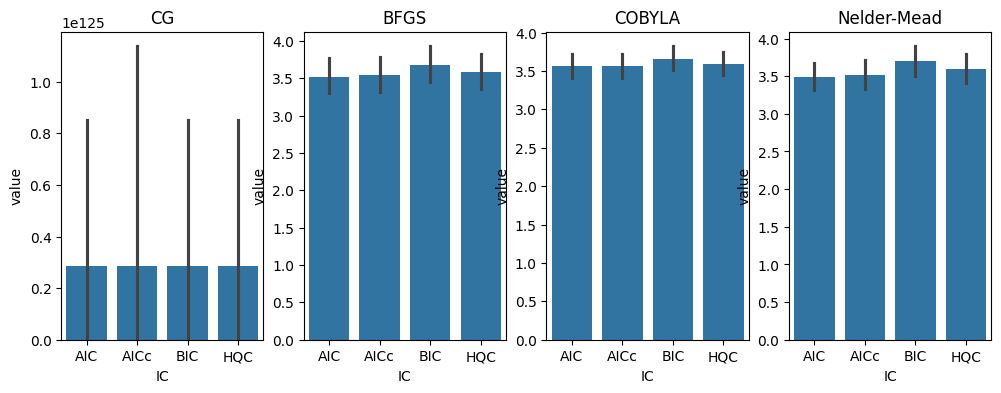

In [48]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    #ax[aidx].set_yla(a)
    #ax[aidx].set_ylim([0,10])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

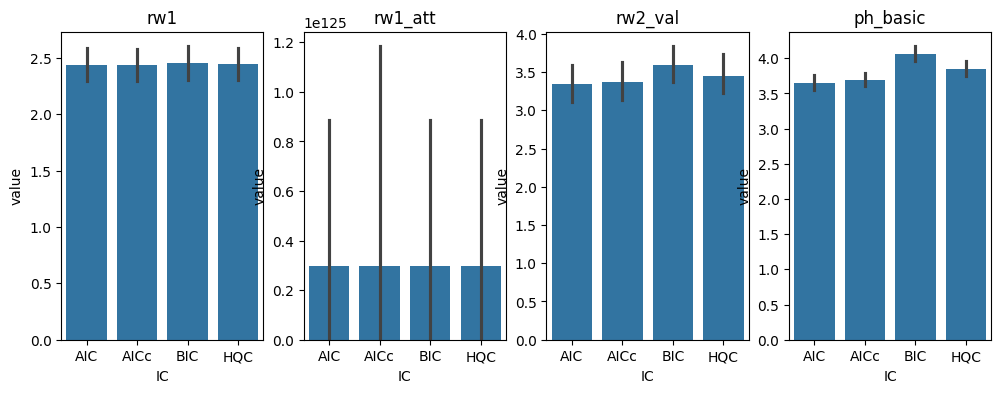

In [49]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    #ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())




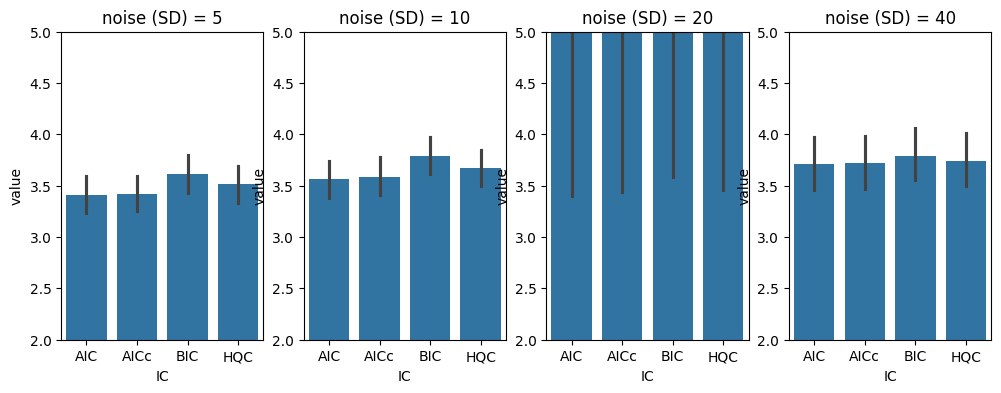

In [45]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([2,5])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



mean_err_AIC     2.131138
mean_err_AICc    2.153879
mean_err_BIC     2.390883
mean_err_HQC     2.245688
dtype: float64


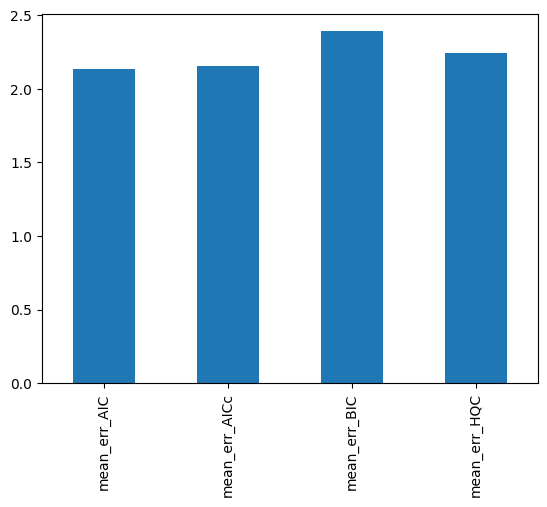

In [12]:

data.filter(regex='^mean_err_').median().plot.bar()
print(data.filter(regex='^mean_err_').median())

<AxesSubplot: xlabel='true_model'>

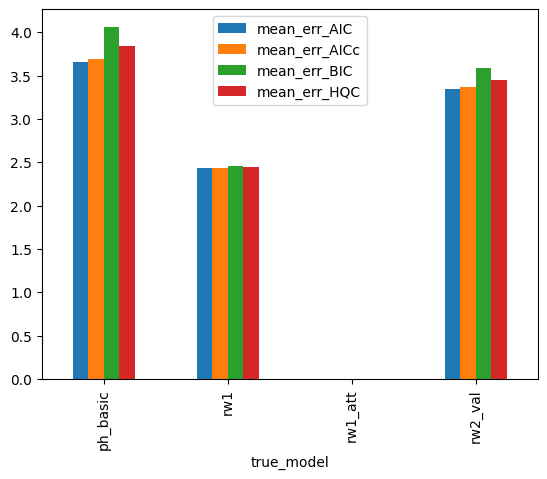

In [13]:
tdf = data.loc[:, ["true_model"]+["mean_err_"+ic for  ic in ics]]
tdf.groupby(by="true_model").mean().plot.bar()

<AxesSubplot: xlabel='noise'>

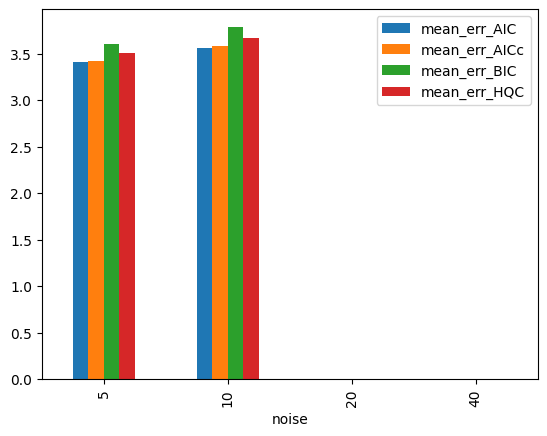

In [14]:
tdf = data.loc[:, ["noise"]+["mean_err_"+ic for  ic in ics]]
tdf.groupby(by="noise").mean().plot.bar()

In [15]:
tdf = data.loc[:, ["cutoff"]+["mean_err_"+ic for  ic in ics]]

#tdf.groupby(by="cutoff").mean().plot.bar()
bdf = tdf.melt(id_vars=["cutoff"], value_vars=["mean_err_"+ic for  ic in ics], var_name="IC", value_name="score")
bdf = bdf.loc[~np.isinf(bdf["score"]),:]
bdf=bdf.dropna()
bdf["score"] = bdf["score"].astype(float)
f, ax = plt.subplots(1,1,figsize=(12,3))       
sns.swarmplot(data=bdf, x="IC", y="score", hue="cutoff", ax=ax)
#bdf["score"].hist()

KeyboardInterrupt: 